## Importing librarys 

In [3]:
import os
import sys
sys.path.append(os.path.join(".."))
import cv2
import numpy as np
from utils.imutils import jimshow
from utils.imutils import jimshow_channel
import matplotlib.pyplot as plt
import zipfile
import pandas as pd

## Unzipping images

In [45]:
path_to_zip = os.path.join("..", "data", "flowers.zip") # Defining the path to the zip file
zip_destination = os.path.join("..", "data", "flowers") # defining the output destination

with zipfile.ZipFile(path_to_zip,"r") as zip_ref: # using the package from zipfile, to un zip the zip file
    #zip_ref.extractall(zip_destination)

## Chosing image function

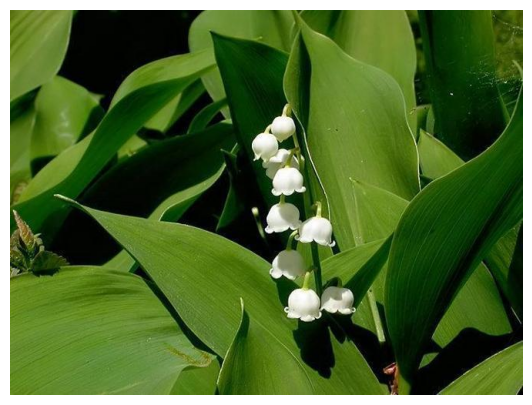

image_0201.jpg


In [4]:

image = os.path.join("..", "data", "flowers", "flowers", "image_0201.jpg") # Defining the path to my chosen image
chosen_image = os.path.basename(image) # Using os.path.basename to get the last component of the path. The last component is the img name 
# I am doing this, to exclude this image in my function when comparing histograms.
flower_image = cv2.imread(image) # using cv2s imread to read the image.
jimshow(flower_image) # Display the image with Ross's function jimshow
print(chosen_image) # Checking if I have got the image name as a string 

flower_hist = cv2.calcHist([flower_image], [0,1,2], None, [256,256,256], [0,256, 0,256, 0,256]) # Calculating histogram of the image. 
#  flower_image = image name, [0,1,2] = colour channels, none = no mask, [256,256,256] = colour channel size, [0,256...] = pixel amount

flower_hist_normalized = cv2.normalize(flower_hist, flower_hist, 0, 1.0, cv2.NORM_MINMAX) # normalizing the image so it easier to compute
# the two first arguments, are the image we want to normalize, the two next arguments are the size we are changing the pixels to
# the last argument is cv2's normalization calculations.



## Defining Function

In [5]:
def hist_function (directory): # creating function with parameter 
    img_score = [] # Creating empty to store tuples of filename and comparison score for all images.
    print("Calculating comparison score") # Checking if the function is running.
    for file_name in os.listdir(directory): # using os.listdir, to create a path to each image, when I define the directory.
        
        if file_name != chosen_image: # excluding my chosen image (the variable I created earlier).

            if file_name.endswith(".jpg"): # only files the end with .jpg can move forward.
                   
                file_path = os.path.join(directory, file_name) # joing the path for each file to the directory.
                flowers_img = cv2.imread(file_path) # reading the image using cv2's imread

                # creating histogram for the img
                flowers_hist = cv2.calcHist([flowers_img], [0,1,2], None, [256,256,256], [0,256, 0,256, 0,256])

                # Normalising the img
                flowers_histnorm = cv2.normalize(flowers_hist, flowers_hist, 0, 1.0, cv2.NORM_MINMAX)

                # Comparing the img score with my chosen image
                comparing_score = round(cv2.compareHist(flower_hist_normalized, flowers_histnorm, cv2.HISTCMP_CHISQR), 2)

                # Saving the filename and the score, in my empty list as a tuple.
                img_score.append((file_name, comparing_score))
    
    print("Done calculating comparison score") # Printing a message to let me know all images are processed now.
    
    five_images = [] # empty list to store the five lowest scored images. 
    print("Finding five lowest scores") # Printing a message to let me know where in the function I am.
    for i in range(5): # For loop that only runs five times.

         # Using min to find the lowest score. lambda is a function in python. I am using it here to find the min value of the second part,
         # Of each tuple in my list.
        five_lowest_score = min(img_score, key=lambda x: x[1])
        five_images.append(five_lowest_score) # Appending the lowest score to my empty list.
        img_score.remove(five_lowest_score) # Removing the appended filename/score, so it does not get appended agaig.
    print("Done finding five lowest scores") # Printing an update message.

    data = pd.DataFrame(five_images, columns=['Filename', 'Score']) # Creating a dataframe with the two columns Filename and Score

    outpath = os.path.join("..", "out", "five_images.csv") # defining output path
    data.to_csv(outpath, index= False) # transforming my dataframe to a csv file, with no index.

## Calling Function

In [6]:
directory = os.path.join("..", "data", "flowers", "flowers") # defining the directory path.
hist_function(directory) # calling my function

Calculating comparison score
Done calculating comparison score
Finding five lowest scores
Done finding five lowest scores


## Looking at the images

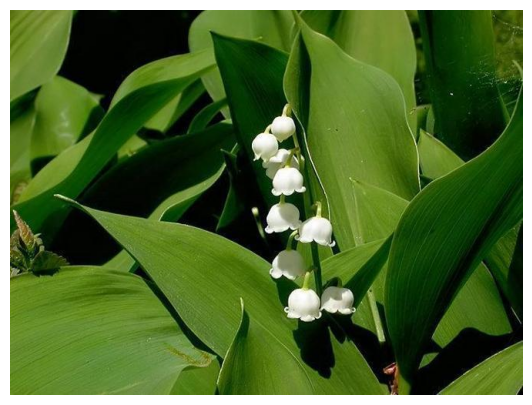

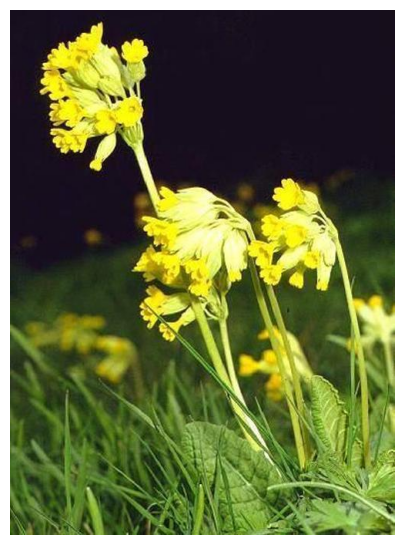

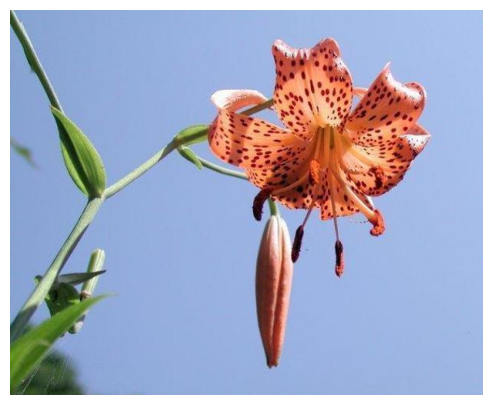

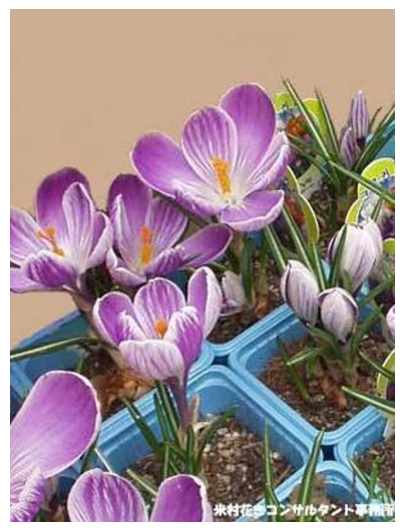

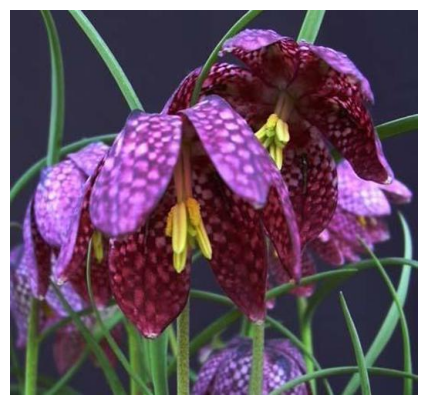

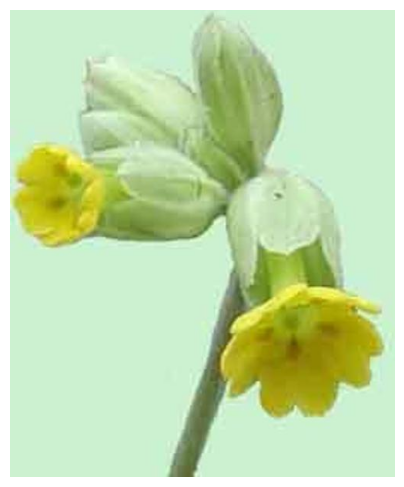

In [7]:
image1 = cv2.imread(os.path.join("..", "data", "flowers", "flowers", "image_1069.jpg"))
image2 = cv2.imread(os.path.join("..", "data", "flowers", "flowers", "image_0510.jpg"))
image3 = cv2.imread(os.path.join("..", "data", "flowers", "flowers", "image_0393.jpg"))
image4 = cv2.imread(os.path.join("..", "data", "flowers", "flowers", "image_0683.jpg"))
image5 = cv2.imread(os.path.join("..", "data", "flowers", "flowers", "image_1044.jpg"))
jimshow(flower_image)
jimshow(image1)
jimshow(image2)
jimshow(image3)
jimshow(image4)
jimshow(image5)